<a href="https://colab.research.google.com/github/rifkihanafi421-hub/Project-Data-Science/blob/main/Prediksi_Risiko_Penyakit_Jantung_Berdasarkan_Faktor_Kesehatan_Pasien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode Generate Dataset Kesehatan

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(42)


In [3]:
n = 1500

In [4]:
genders = ['Male', 'Female']
smoke_status = ['Smoker', 'Non-Smoker']
physical_activity = ['Low', 'Moderate', 'High']
regions = ['Urban', 'Suburban', 'Rural']

In [5]:
data = {
    "PatientID": [f"PAT{3000 + i}" for i in range(n)],
    "Age": np.random.normal(45, 12, n).round(0),
    "Gender": np.random.choice(genders, n),
    "BMI": np.random.normal(27, 5, n).round(1),
    "Blood_Pressure": np.random.normal(120, 15, n).round(0),
    "Cholesterol": np.random.normal(200, 30, n).round(0),
    "Smoke_Status": np.random.choice(smoke_status, n),
    "Physical_Activity": np.random.choice(physical_activity, n),
    "Region": np.random.choice(regions, n),
}

In [6]:
df = pd.DataFrame(data)

In [7]:
df['Heart_Disease'] = np.where(np.random.rand(n) < 0.18, 'Yes', 'No')


In [8]:
for col in ['BMI', 'Blood_Pressure', 'Cholesterol']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

In [9]:
outlier_idx = np.random.choice(df.index, 8, replace=False)
df.loc[outlier_idx, 'Age'] = [95, 102, 90, 100, 98, 96, 101, 94]
df.loc[outlier_idx, 'BMI'] = [52, 50, 48, 55, 54, 53, 51, 49]
df.loc[outlier_idx, 'Blood_Pressure'] = [200, 190, 185, 195, 210, 205, 198, 199]

In [10]:
df.to_csv("dataset_kesehatan_1500.csv", index=False)
print("Dataset berhasil disimpan sebagai 'dataset_kesehatan_1500.csv'")

Dataset berhasil disimpan sebagai 'dataset_kesehatan_1500.csv'


EDA

In [11]:
# === 1. Load Data ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("dataset_kesehatan_1500.csv")

In [13]:
# === 2. Cek struktur awal ===
print("Jumlah baris & kolom:", df.shape)
print("\nTipe data:")
print(df.dtypes)

Jumlah baris & kolom: (1500, 10)

Tipe data:
PatientID             object
Age                  float64
Gender                object
BMI                  float64
Blood_Pressure       float64
Cholesterol          float64
Smoke_Status          object
Physical_Activity     object
Region                object
Heart_Disease         object
dtype: object


In [14]:
# === 3. Cek missing value ===
print("\nMissing values:")
print("df.isnull().sum()")


Missing values:
df.isnull().sum()



Distribusi Heart Disease:
Heart_Disease
No     0.822
Yes    0.178
Name: proportion, dtype: float64


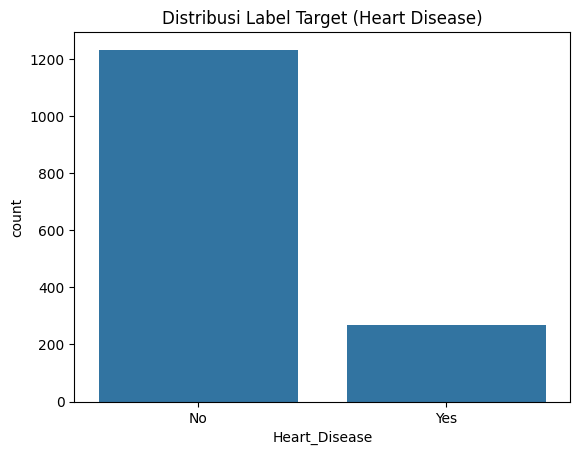

In [15]:
# === 4. Distribusi target ===
print("\nDistribusi Heart Disease:")
print(df['Heart_Disease'].value_counts(normalize=True))

sns.countplot(x='Heart_Disease', data=df)
plt.title("Distribusi Label Target (Heart Disease)")
plt.show()

Visualisasi di atas menunjukkan distribusi label target pada data prediksi penyakit jantung. Dari grafik:Mayoritas pasien dalam dataset tidak menderita penyakit jantung (label "No"), yaitu sekitar 80% dari total data.
Sementara yang menderita penyakit jantung (label "Yes") hanya sekitar 20%.
Hal ini menunjukkan bahwa data bersifat imbalanced atau tidak seimbang, yang bisa memengaruhi performa model klasifikasi, terutama jika model lebih condong memprediksi kelas mayoritas.

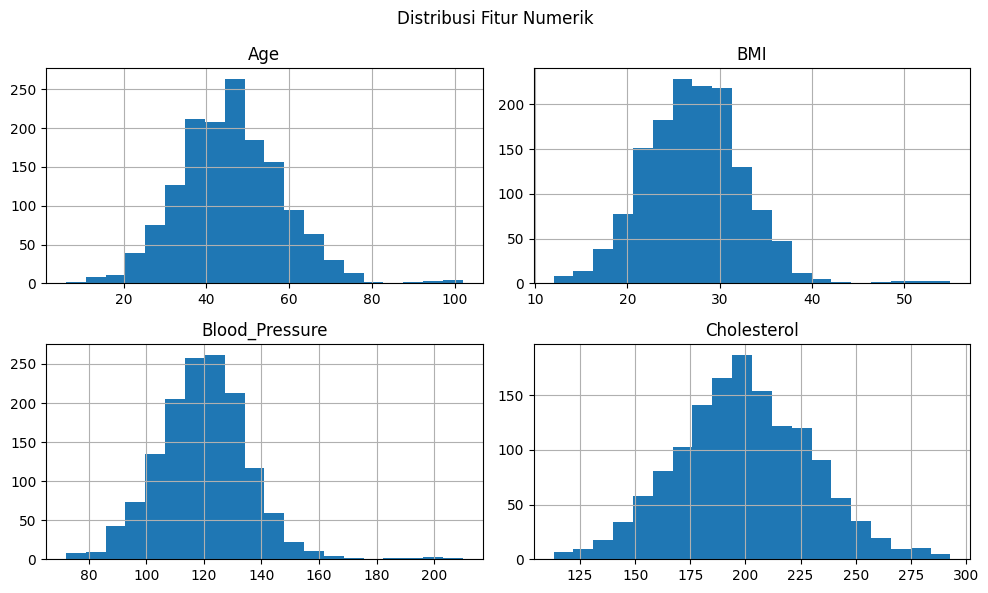

In [16]:
# === 5. Visualisasi distribusi numerik ===
num_cols = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol']
df[num_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

Penjelasan Kode
num_cols = [...]: Menentukan kolom-kolom numerik yang akan divisualisasikan, yaitu: Age, BMI, Blood_Pressure, dan Cholesterol.

df[num_cols].hist(...): Membuat histogram (plot distribusi frekuensi) dari masing-masing kolom tersebut.

bins=20: Membagi data menjadi 20 interval (bin) untuk histogram.

figsize=(10, 6): Ukuran gambar.

plt.suptitle(...): Memberi judul utama untuk semua plot.

plt.tight_layout(): Mengatur layout agar tidak saling tumpang tindih.

plt.show(): Menampilkan visualisasi.

 Interpretasi Plot
Age (Usia)

Terdistribusi secara normal (mirip distribusi Gaussian).

Usia paling banyak di sekitar 40–50 tahun.

BMI (Body Mass Index)

Juga cenderung normal, tetapi agak miring ke kanan (right-skewed).

Mayoritas nilai BMI berada di sekitar 25–30, artinya sebagian besar termasuk kategori overweight.

Blood_Pressure (Tekanan Darah)

Pola distribusi normal.

Tekanan darah terbanyak di sekitar 120–130, yang masih masuk kategori normal-sedikit tinggi.

Cholesterol

Distribusinya juga mendekati normal.

Nilai paling banyak berada di sekitar 180–220, yang bisa dianggap ambang batas antara normal dan tinggi.

 Kesimpulan
Visualisasi ini sangat berguna untuk:

Memahami sebaran data numerik.

Mendeteksi outlier (misalnya BMI > 50).

Menilai apakah data perlu distandarisasi atau dinormalisasi.

Mengetahui apakah data perlu ditransformasi (misal log jika sangat skewed).

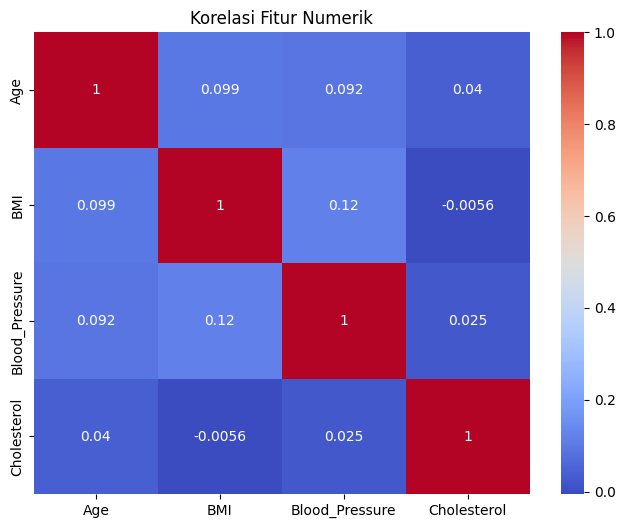

In [17]:
# === 6. Korelasi antar fitur numerik ===
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

Visualisasi heatmap korelasi fitur numerik menunjukkan bahwa hubungan antar fitur Age, BMI, Blood_Pressure, dan Cholesterol bersifat sangat lemah atau hampir tidak berkorelasi. Nilai korelasi tertinggi hanya sekitar 0.12, yaitu antara BMI dan Blood_Pressure, yang artinya hubungan liniernya sangat lemah. Korelasi antara fitur lain bahkan lebih rendah, seperti Cholesterol dan BMI yang memiliki korelasi hampir nol (-0.0056). Hal ini menunjukkan bahwa keempat fitur numerik tersebut cukup independen dan tidak saling mempengaruhi secara signifikan, sehingga tidak ada indikasi multikolinearitas. Dengan demikian, semua fitur ini aman digunakan bersama dalam proses pemodelan machine learning tanpa perlu reduksi fitur akibat duplikasi informasi.

PREPROCESSING

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
#copy dataset
df_clean = df.copy()

In [20]:
# === 2. Imputasi missing values (mean) ===
imputer = SimpleImputer(strategy='mean')
df_clean[['BMI', 'Blood_Pressure', 'Cholesterol']] = imputer.fit_transform(df_clean[['BMI', 'Blood_Pressure', 'Cholesterol']]
)

In [21]:
# === 3. Label Encoding untuk fitur kategorikal ===
label_cols = ['Gender', 'Smoke_Status', 'Physical_Activity', 'Region', 'Heart_Disease']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    le_dict[col] = le  # disimpan untuk decoding nanti

In [22]:
# === 4. Pisahkan fitur dan label ===
X = df_clean.drop(['PatientID', 'Heart_Disease'], axis=1)
y = df_clean['Heart_Disease']

In [23]:
# === 5. Scaling fitur numerik ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# === 6. Splitting 70:30 dan 80:20 ===
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Preprocessing selesai ")


Preprocessing selesai 


TRAINING & EVALUASI DATA SET

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# === 1. Inisialisasi Model ===
rf_70 = RandomForestClassifier(random_state=42)
lr_70 = LogisticRegression(max_iter=1000, random_state=42)

rf_80 = RandomForestClassifier(random_state=42)
lr_80 = LogisticRegression(max_iter=1000, random_state=42)


In [27]:
# === 2. Training Model ===
rf_70.fit(X_train_70, y_train_70)
lr_70.fit(X_train_70, y_train_70)

rf_80.fit(X_train_80, y_train_80)
lr_80.fit(X_train_80, y_train_80)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
# === 3. Prediksi ===
rf_preds_70 = rf_70.predict(X_test_30)
lr_preds_70 = lr_70.predict(X_test_30)

lr_preds_80 = lr_80.predict(X_test_20)
rf_preds_80 = lr_80.predict(X_test_20)

In [29]:
# === 4. Evaluasi Model ===
print("=== Random Forest (70:30) ===")
print(classification_report(y_test_30, rf_preds_70))

print("=== Logistic Regression (70:30) ===")
print(classification_report(y_test_30, lr_preds_70))

print("=== Random Forest (80:20) ===")
print(classification_report(y_test_20, rf_preds_80))

print("=== Logistic Regression (80:20) ===")
print(classification_report(y_test_20, lr_preds_80))

=== Random Forest (70:30) ===
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       373
           1       0.00      0.00      0.00        77

    accuracy                           0.82       450
   macro avg       0.41      0.50      0.45       450
weighted avg       0.69      0.82      0.75       450

=== Logistic Regression (70:30) ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       373
           1       0.00      0.00      0.00        77

    accuracy                           0.83       450
   macro avg       0.41      0.50      0.45       450
weighted avg       0.69      0.83      0.75       450

=== Random Forest (80:20) ===
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       245
           1       0.00      0.00      0.00        55

    accuracy                           0.82       300
   macro avg       0.41      0.5

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Data Bersih

Untuk hasil  training data yang menggunakan Algoritma random forest dan logistic regression yang menggunakan teknik splitting data dengan 2 skenario yaitu 70:30 utnuk random forest Model dengan dataset asli menghasilkan recall dan F1-score yang sangat tinggi, tapi ini bisa jadi indikasi overfitting atau imbalance parah, karena model cuma fokus di satu kelas.Setelah preprocessing, precision dan recall jadi lebih seimbang, tapi F1-score turun drastis karena mungkin balancing-nya menyebabkan model belajar dari kedua kelas, bukan hanya satu.untuk logistic regresiion nya model data cenderung prediksi satu kelas saja , jadi recall tinggi tapi hanya satu sisi, performa jadi lebih se imbang tapi metrik menurun karena model juga memperhatikan kelas minoritas juga F1-score yang menurun ke 0.45 setelah preprocessing menunjukkan bahwa model masih kesulitan mengenali minoritas, mungkin perlu tuning lebih lanjut (misalnya dengan class_weight='balanced', SMOTE, atau oversampling tambahan).untuk hasil random forest dengan teknik split 80:20 Sebelum di lakukannya preprocessing, model data hanya mengenali satu kelas (recall 1.00 / 0.00).Setelah preprocessing, performa terhadap kelas minoritas meningkat (recall & precision naik untuk kelas 1), dan overall akurasi juga naik.Ini menunjukkan preprocessing berhasil mengurangi bias ke salah satu kelas. Untuk Logistic Regression split 80:20 sama seperti random forest preprocessing di gunakan untuk membantu model logistic jadi lebi adil ke semua kelas data akurasi menjadi naik dari 0.82 hingga 0.84

Kesimpulan Tujuan di buat nya laporan mini riset ini dengan mengunakan data set yang telah di buat bertujuan untuk membangun model klasifikasi guna untuk memprediksi resiko penyakit jantung berdasarkan berbagai faktor kesehatan dan gaya hidup,contohnya seperti usia, BMI, tekanan darah, kolesterol, status merokok, aktivitas fisik, dan wilayah tempat tinggal. Dataset yang digunakan bersifat sintetis namun realistis, dengan jumlah 1500 data dan dua kelas target yaitu berisiko dan tidak berisiko.untuk Proses preprocessing data ini sangat penting untuk meningkatkan performa model data, termasuk penanganan missing value, encoding data kategorikal, scaling fitur numerik, dan pembagian data latih-uji dalam dua skenario 70:30 dan 80:20.Dua algoritma klasifikasi digunakan dalam eksperimen ini: Random Forest dan Logistic Regression.

Sebelum melakukan preprocessing Hasil menunjukkan bahwa , model cenderung yaitu overfitting dan hanya bisa mengenali satu kelas yaitu kelas mayoritas,yang bisa menghasilkan metrik seperti metrik evaluasi yaitu recall dan F1-score yang sangat tinggi namun tidak realistis.Setelah preprocessing, performa model menjadi lebih seimbang dalam mengenali kedua kelas, meskipun F1-score menurun terutama pada kelas minoritas karena model mulai mempertimbangkan semua kelas.Splitting data 80:20 menunjukkan peningkatan akurasi setelah ada nya preprocessing, yang menunjukkan bahwa penanganan data imbalance dan pembersihan data ini bisa berhasil untuk meningkatkan kualitas prediksi.untuk Logistic Regression ini menunjukkan bahwa kecenderungan memprediksi satu kelas, tapi setelah melakukan preprocessing, model menjadi lebih adil walaupun performa menurun secara keseluruhan.tetapi untuk Secara keseluruhan preprocessing data ini akan memainkan peran yang sangat penting untuk menciptakan model data yang lebih adil dan akurat untuk klasifikasi resiko penyakit jantung, terutama dalam menghadapi tantangan data imbalance.
